In [18]:
# Load Libraries
import sklearn
import joblib

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


In [19]:
df = pd.read_csv('Student_performance_data _.csv')
y = df['GPA']
x = df.drop(columns=['StudentID', 'Gender', 'Ethnicity', 'ParentalEducation', 'GradeClass', 'GPA'])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print("Train size:", x_train.shape, y_train.shape)
print("Test size:", x_test.shape, y_test.shape)

Train size: (1913, 9) (1913,)
Test size: (479, 9) (479,)


Lineal: RMSE=0.197, R²=0.953
Polinómica grado 2: RMSE=0.196, R²=0.954
Tree        : RMSE=0.327, R²=0.871
RandomForest: RMSE=0.237, R²=0.932


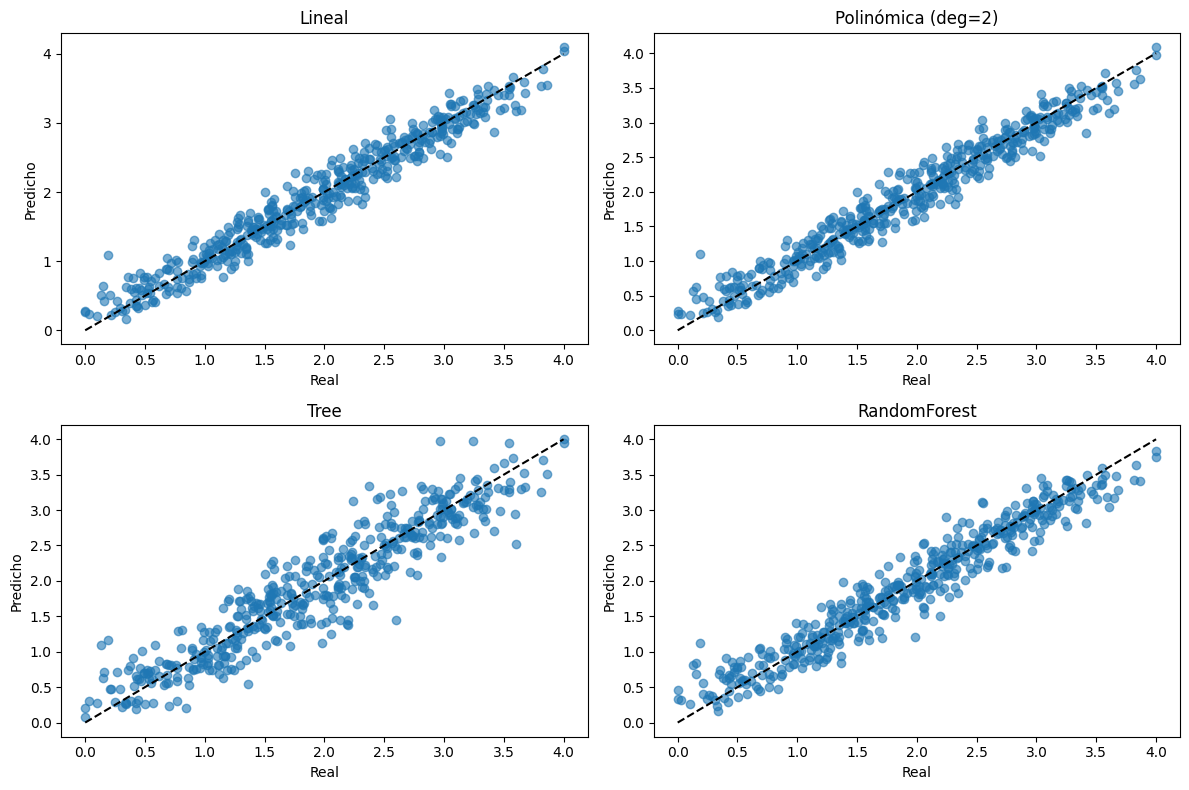

In [20]:
# Modelo lineal
linear = LinearRegression()
linear.fit(x_train, y_train)
y_pred_lin = linear.predict(x_test)

# Modelo polinómico (grado 2 como ejemplo)
poly2 = Pipeline([
    ("poly", PolynomialFeatures(degree=2, include_bias=False)),
    ("lin", LinearRegression())
])
poly2.fit(x_train, y_train)
y_pred_poly2 = poly2.predict(x_test)

# Métricas
rmse_lin = np.sqrt(mean_squared_error(y_test, y_pred_lin))
r2_lin = r2_score(y_test, y_pred_lin)

rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly2))
r2_poly = r2_score(y_test, y_pred_poly2)

print(f"Lineal: RMSE={rmse_lin:.3f}, R²={r2_lin:.3f}")
print(f"Polinómica grado 2: RMSE={rmse_poly:.3f}, R²={r2_poly:.3f}")

# Árbol de decisión
tree = DecisionTreeRegressor(random_state=42)
tree.fit(x_train, y_train)
y_pred_tree = tree.predict(x_test)

# Random Forest
forest = RandomForestRegressor(n_estimators=200, random_state=42)
forest.fit(x_train, y_train)
y_pred_forest = forest.predict(x_test)

# Métricas
for name, y_pred in {
    "Tree": y_pred_tree,
    "RandomForest": y_pred_forest
}.items():
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print(f"{name:12}: RMSE={rmse:.3f}, R²={r2:.3f}")


modelos = ["Lineal", "Polinómica (deg=2)", "Tree", "RandomForest"]
predicciones = [y_pred_lin, y_pred_poly2, y_pred_tree, y_pred_forest]

plt.figure(figsize=(12,8))
for i, (nombre, y_pred) in enumerate(zip(modelos, predicciones), 1):
    plt.subplot(2,2,i)
    plt.scatter(y_test, y_pred, alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
    plt.title(nombre)
    plt.xlabel("Real"); plt.ylabel("Predicho")
plt.tight_layout()
plt.show()